
# K-Means Clustering
###   Use scikit-learn's K-Means Clustering to cluster data
<center>
    <img src="https://miro.medium.com/max/1017/1*vNng_oOsNRHKrlh3pjSAyA.png" width="1200" height = "520" alt="Unlabeled Data"  />
</center>




## Introduction

There are many models for **clustering** out there. This notebook consists one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. 

Some real-world applications of k-means:

-   Customer segmentation
-   Understand what the visitors of a website are trying to accomplish
-   Pattern recognition
-   Machine learning
-   Data compression

In this notebook there are 2 k-means clustering examples:

-   k-means on a random generated dataset
-   Using k-means for customer segmentation


# Random Data First

### Import libraries

Lets first import the required libraries.

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
floats = random.sample(range(-77, 77), 50)
x1 = [x/10 for x in floats]
floats = random.sample(range(-74, 74), 50)
x2 = [n/10 for n in floats]
print('Printing x1', x1)
print('Printing x2', x2)


Printing x1 [-0.3, 5.1, 6.2, 4.5, -6.7, -4.5, -1.3, 4.9, -7.7, 2.9, 3.3, 1.7, 0.5, 4.1, -6.2, 0.7, -6.4, -6.3, -4.8, 7.0, 6.0, -1.7, -0.9, 5.4, -3.1, 2.2, 5.3, 2.4, 3.4, -1.2, -7.0, -2.4, -4.3, -0.7, 7.5, 2.8, -6.8, -5.5, 1.5, -2.3, -1.0, 7.4, 3.8, 3.0, 3.9, -3.3, -1.4, -6.5, -5.6, 0.0]
Printing x2 [-2.4, -4.1, 5.7, -2.3, -4.0, 3.5, -2.6, -6.4, -3.2, 3.4, -0.1, -3.0, -4.4, -4.6, 5.2, 5.5, -3.3, -6.3, 0.7, 0.6, -1.1, 4.8, -5.5, 5.6, 4.3, -0.7, 1.1, -6.9, 6.6, 3.8, 6.3, -0.6, 4.0, -5.8, 2.1, 5.9, 2.8, -6.7, 0.2, 1.6, -0.2, -2.7, -7.1, -1.7, -5.3, 5.1, -1.0, 4.5, -1.6, -4.7]


In [3]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function has executed!')

assign_members function has executed!


In [4]:
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function has executed!')

assign_members function has executed!


In [5]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function has executed!')

plot_points function has executed!


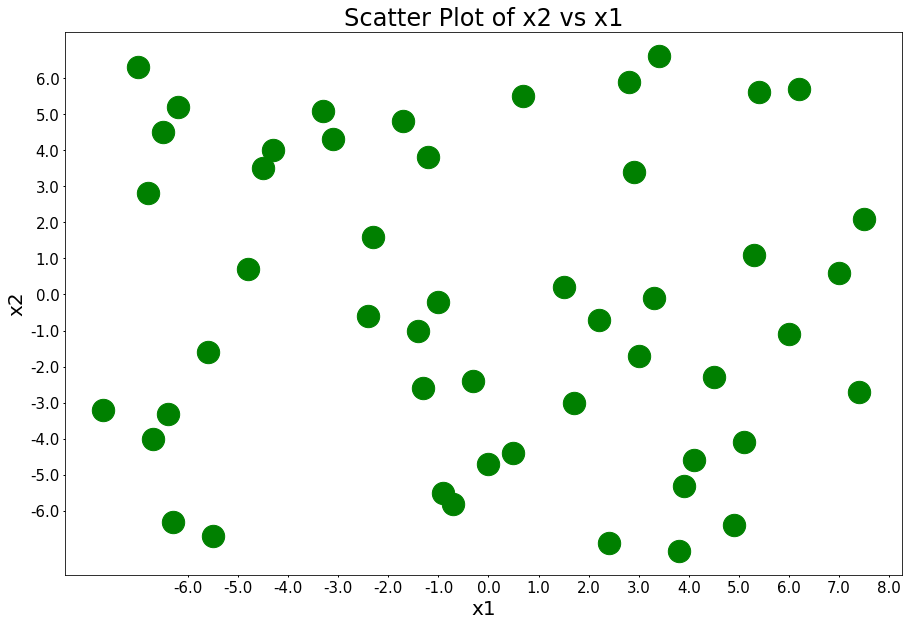

In [6]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

### Is it possible to label data as you see? You may label it intuitively, but in real world applications we need to use the mathematical procedures to find the best one.

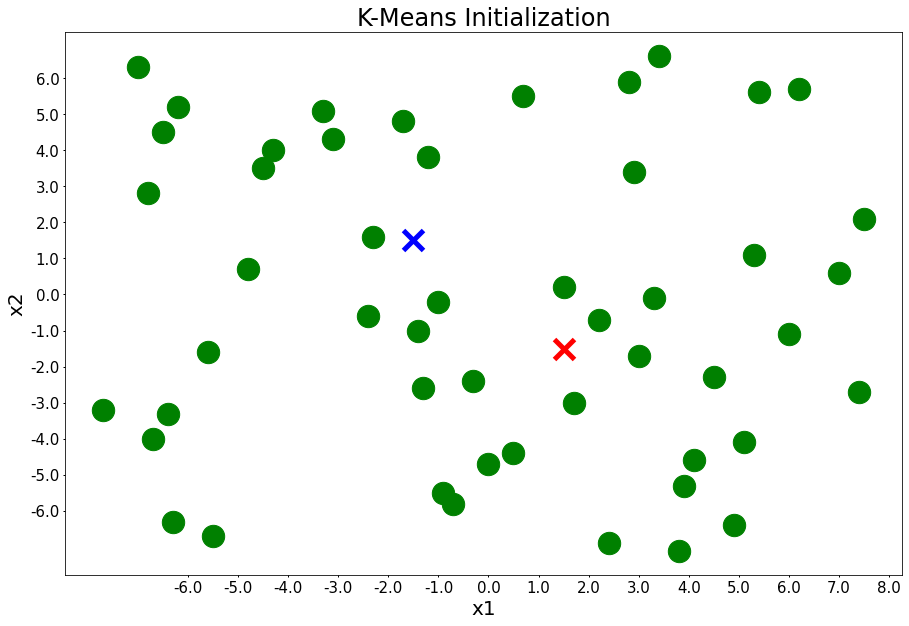

In [7]:
centers = [[-1.5, 1.5], [1.5, -1.5]] # change and see what happens, I chose them as -1.5
plot_points(centers, figure_title='K-Means Initialization')

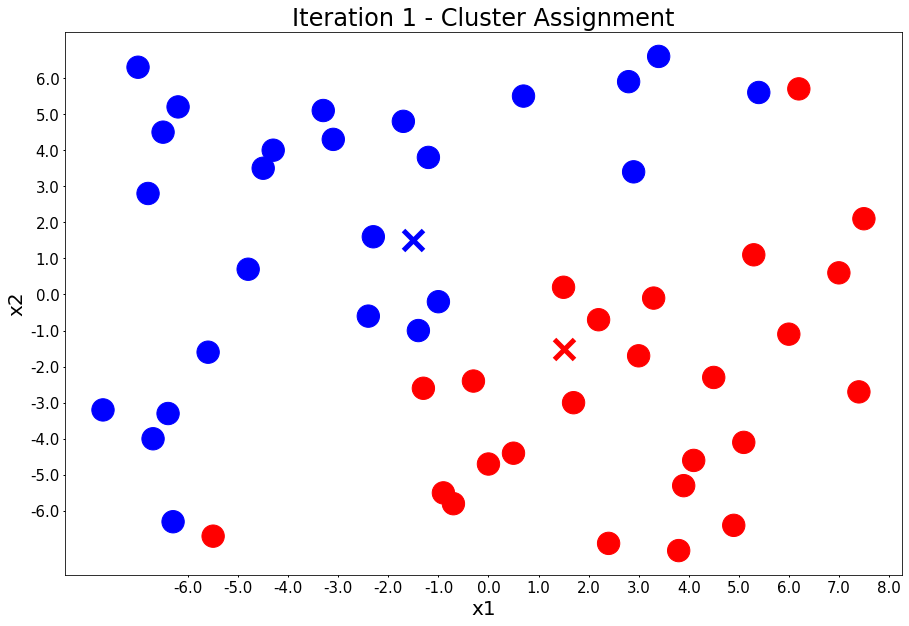

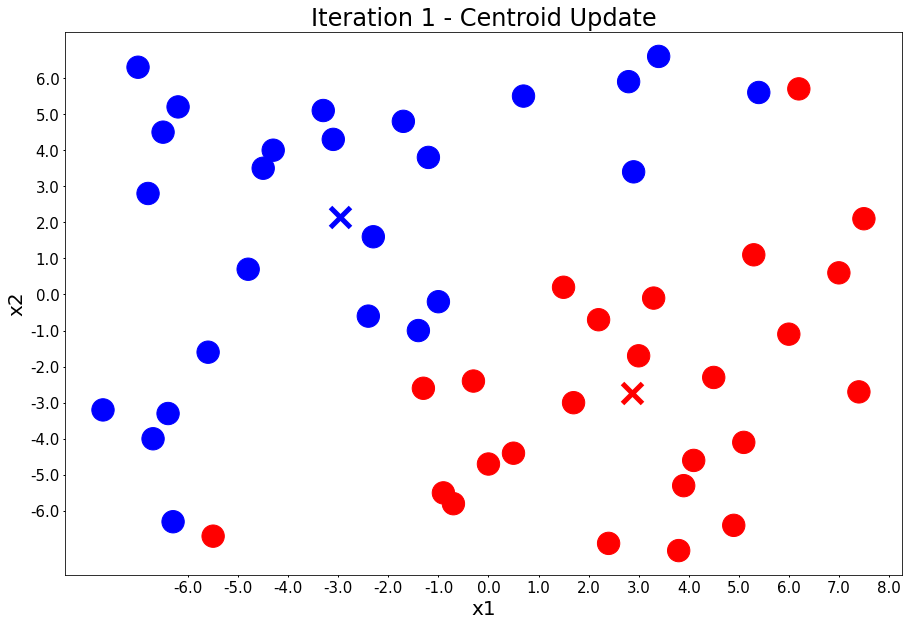

Centers:  [[-2.96, 2.136], [2.864, -2.736]]


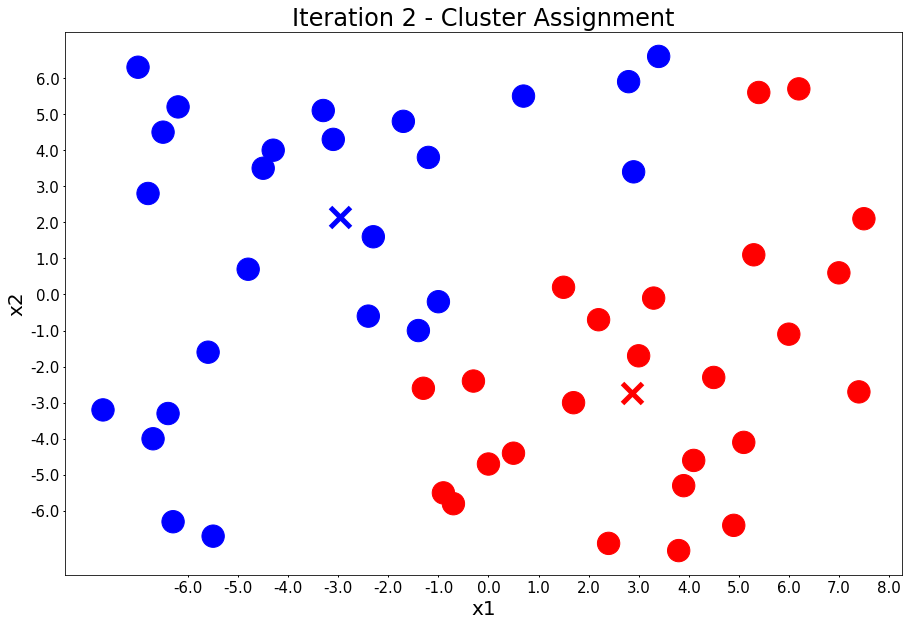

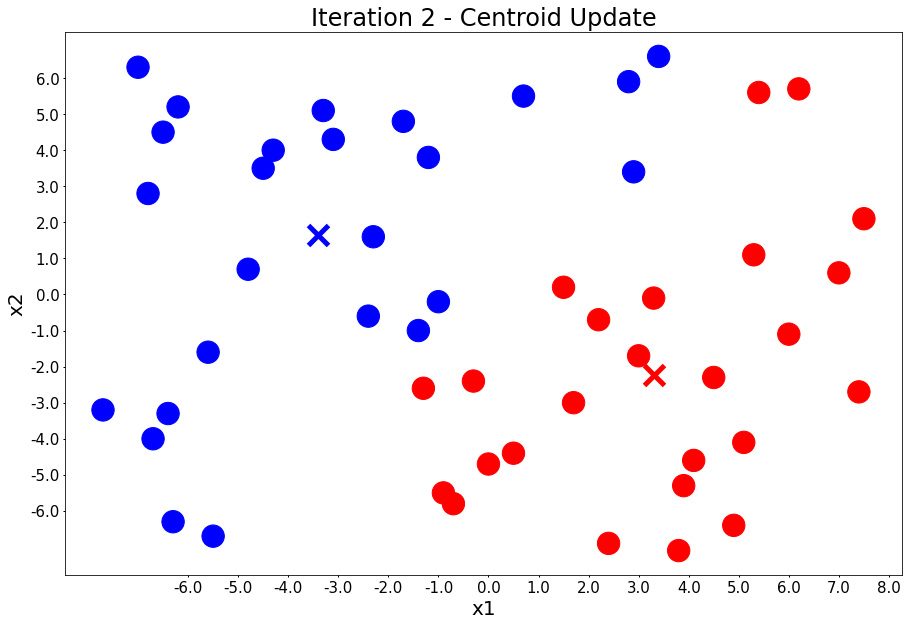

Centers:  [[-3.3960000000000004, 1.6440000000000001], [3.3, -2.244]]


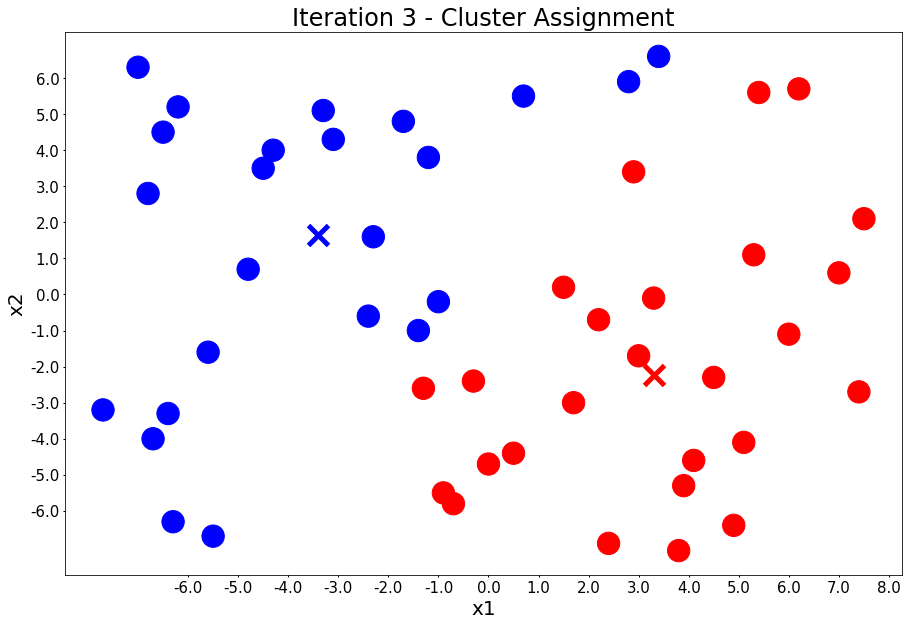

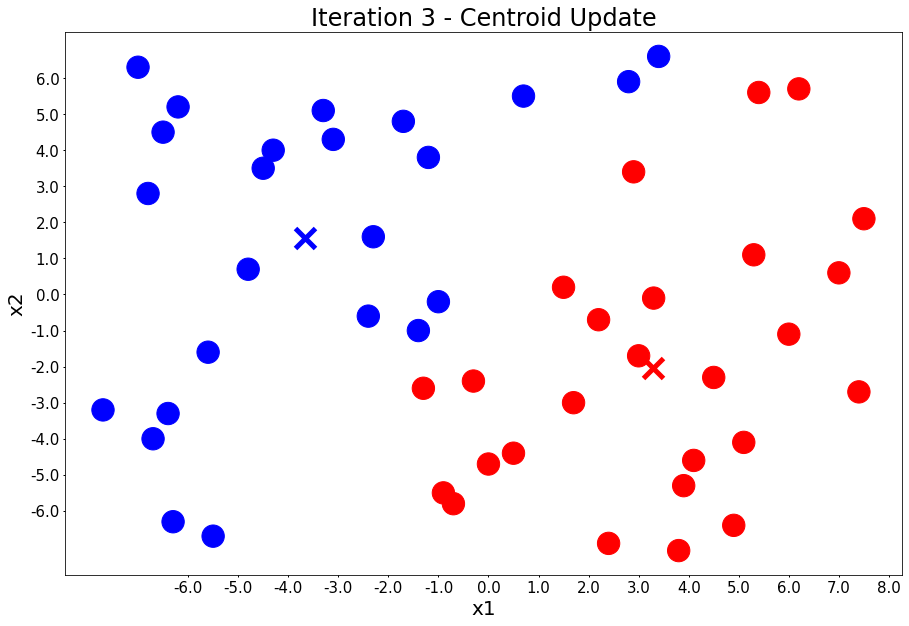

Centers:  [[-3.658333333333333, 1.5708333333333335], [3.284615384615385, -2.026923076923077]]


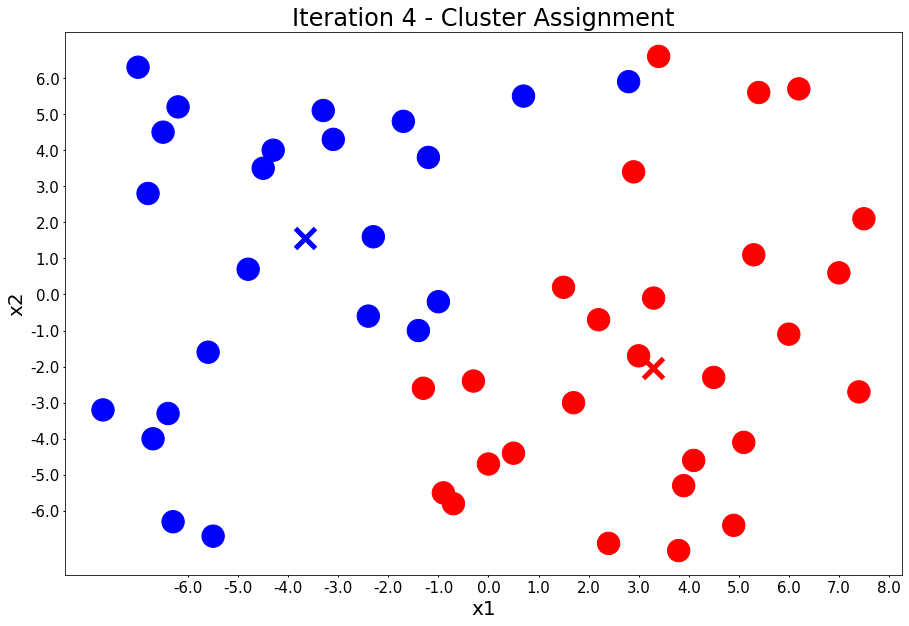

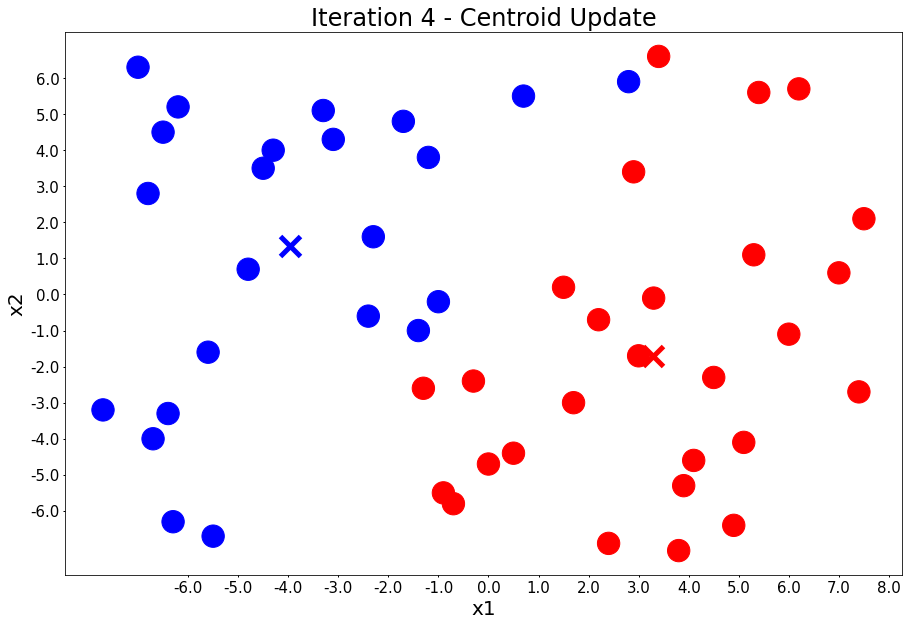

Centers:  [[-3.965217391304347, 1.3521739130434782], [3.288888888888889, -1.7074074074074077]]


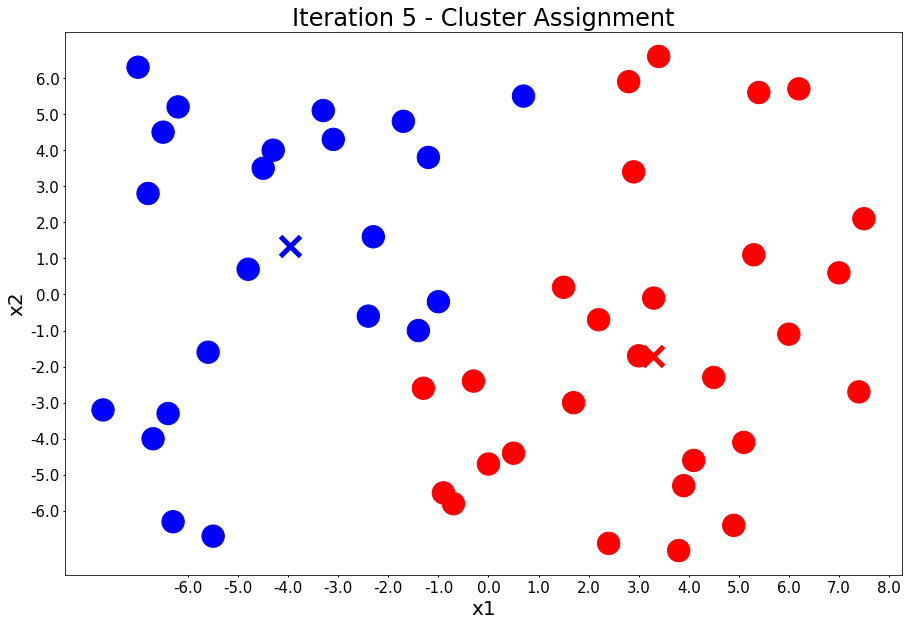

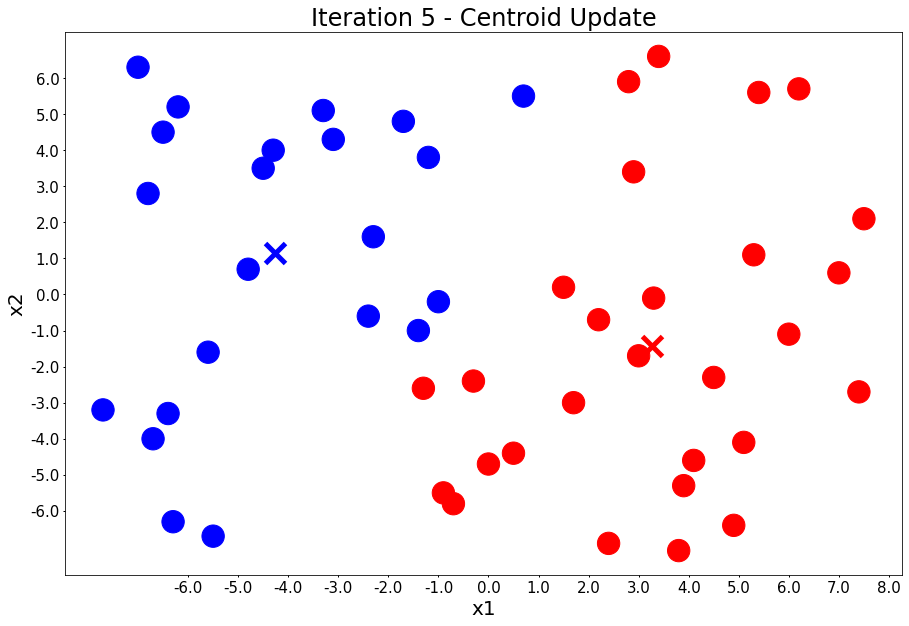

Centers:  [[-4.2727272727272725, 1.1454545454545455], [3.271428571428572, -1.4357142857142862]]


In [8]:
iterations = 5
for i in range(iterations):
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    centers = update_centers(x1, x2, class_of_points)
    
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    print("Centers: ", centers)


<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>



### Load Data From CSV File

Use pandas read method to use the dataset.

In [9]:
import pandas as pd
data = pd.read_csv("Cust_Segmentation.csv")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [11]:
data.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


<h2 id="pre_processing">Pre-processing</h2


As you can see, **Address** in this dataset is a categorical variable. As Scikit really don't understand them, either we need to convert or drop it. Euclidean distance function isn't really meaningful for discrete variables. So, for this time lets drop this feature and run clustering.


In [12]:
df = data.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing data

Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally.


In [13]:
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = (X - np.min(X)) / (np.max(X) - np.min(X))
Clus_dataSet

array([[0.09192825, 0.0044843 , 0.01345291, ..., 0.00240583, 0.        ,
        0.01412556],
       [0.10538117, 0.00224215, 0.05829596, ..., 0.01842601, 0.        ,
        0.02869955],
       [0.07399103, 0.0044843 , 0.02242152, ..., 0.01300897, 0.00224215,
        0.04686099],
       ...,
       [0.05605381, 0.00896861, 0.        , ..., 0.00719731, 0.00224215,
        0.07488789],
       [0.07174888, 0.00224215, 0.02690583, ..., 0.00156054, 0.        ,
        0.00650224],
       [0.11659193, 0.00224215, 0.03587444, ..., 0.00815695, 0.        ,
        0.01928251]])

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.


In [14]:
clusterNum = 3
k_means_n = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_n.fit(X)
labels = k_means_n.labels_
print(labels)

KMeans(n_clusters=3, n_init=12)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

<h2 id="insights">Insights</h2>
We assign the labels to each row in dataframe.


In [15]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.


In [16]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


Now, lets look at the distribution of customers based on their age and income:


Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

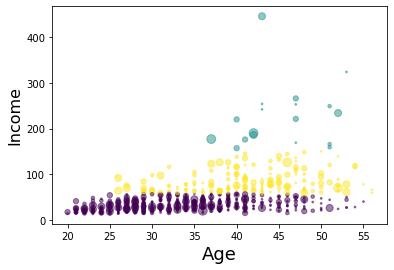

In [17]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()


Text(0.5, 0, 'Education')

Text(0.5, 0, 'Age')

Text(0.5, 0, 'Income')

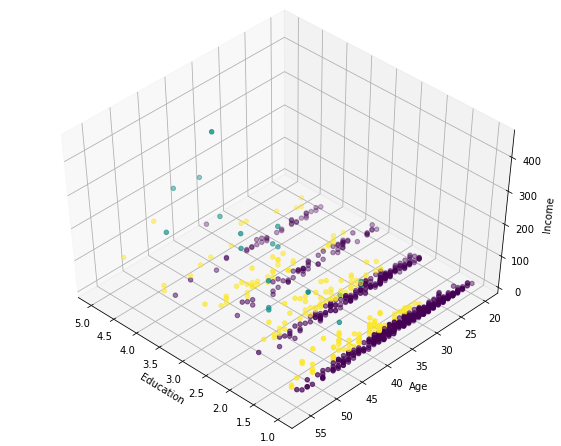

In [18]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


K-Means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

-   AFFLUENT, EDUCATED AND OLD AGED
-   MIDDLE AGED AND MIDDLE INCOME
-   YOUNG AND LOW INCOME
